## **Data Analysis: Ride-Hailing**
1. Data Exploration:
Load the data and understand its basic structure.
Get a sense of missing values, data types, and the overall distribution of certain key variables.

2. Data Analysis:
Identify rides where the upfront price was off by more than 20% from the metered price.
Investigate the variables to identify patterns or factors contributing to this discrepancy.

3. Recommendation:
Based on the analysis, suggest 1-2 opportunities to improve upfront pricing precision.

### **Data Exploration**

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

#current working directory
import os
print(os.getcwd())

In [2]:
from pathlib import Path

# Define the path
file_path = Path(r"C:\Users\psupa\Desktop\Portfolio Projects\Data Driven & Decision Support\Taxi Upfront Pricing Precision\data\raw_data\test.csv")

# Load the data using the correct file name
data = pd.read_csv(file_path)


# Display the first few rows of the data
data.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,...,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


### **Exploratory Data Analysis**
##### **Step I:**
- Get a basic understanding of the data's shape, missing values, and data types.
- Explore the distribution of key variables such as metered_price, upfront_price, distance, duration, and predicted_duration.
- Calculate the percentage discrepancy between the upfront_price and metered_price for each ride.

**Understanding the basic properties of the dataset**

In [3]:
# Check the shape, data types, and missing values of the dataset
data_info = data.info()

# Check the basic statistics for key numerical columns
data_describe = data[['metered_price', 'upfront_price', 'distance', 'duration', 'predicted_duration']].describe()

data_info, data_describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id_new           4943 non-null   int64  
 1   order_try_id_new       4943 non-null   int64  
 2   calc_created           4943 non-null   object 
 3   metered_price          4923 non-null   float64
 4   upfront_price          3409 non-null   float64
 5   distance               4943 non-null   int64  
 6   duration               4943 non-null   int64  
 7   gps_confidence         4943 non-null   int64  
 8   entered_by             4943 non-null   object 
 9   b_state                4943 non-null   object 
 10  dest_change_number     4943 non-null   int64  
 11  prediction_price_type  4923 non-null   object 
 12  predicted_distance     4923 non-null   float64
 13  predicted_duration     4923 non-null   float64
 14  change_reason_pricing  298 non-null    object 
 15  tick

(None,
        metered_price  upfront_price       distance      duration  \
 count    4923.000000    3409.000000    4943.000000   4943.000000   
 mean     7998.471296    4160.095747    9769.223144   1566.230629   
 std     15815.850352   17015.711912   10912.426401   1650.329858   
 min         2.000000       2.000000       0.000000      0.000000   
 25%         5.380000       4.200000    3785.500000    604.000000   
 50%        13.350000       6.600000    7140.000000   1054.000000   
 75%     10991.670000    4000.000000   11953.000000   1929.500000   
 max    194483.520000  595000.000000  233190.000000  22402.000000   
 
        predicted_duration  
 count         4923.000000  
 mean          1106.737355  
 std            806.098535  
 min              0.000000  
 25%            597.500000  
 50%            939.000000  
 75%           1427.000000  
 max          20992.000000  )

**Brief overview of the dataset:**

- The dataset contains 4,943 entries with 26 columns.
- Some columns have missing data, notably metered_price, upfront_price, predicted_distance, predicted_duration, and fraud_score.
- The metered_price ranges from 2 units to 194,483.52 units with a median of 13.35 units.
- The upfront_price ranges from 2 units to 595,000 units with a median of 6.6 units.
- The actual distance of rides ranges from 0 to 233,190 meters, while the actual duration ranges from 0 to 22,402 seconds.
- The predicted_duration ranges from 0 to 20,992 seconds

##### **Step II:**
- Calculate the percentage discrepancy between the upfront_price and metered_price for each ride.
- Explore the distribution of this discrepancy to understand how often the upfront pricing is inaccurate by more than 20%.
- Further investigate variables that might be contributing to these discrepancies.


**Calculate the percentage discrepancy between upfront_price and metered_price**

In [4]:
# Calculate the percentage discrepancy between upfront_price and metered_price
data['price_discrepancy'] = ((data['metered_price'] - data['upfront_price']) / data['upfront_price']) * 100

# Explore the distribution of price discrepancy
price_discrepancy_describe = data['price_discrepancy'].describe()

price_discrepancy_describe

count    3409.000000
mean       18.650939
std        68.102058
min       -97.700427
25%        -4.266667
50%         4.416000
75%        27.105263
max      1154.732387
Name: price_discrepancy, dtype: float64

**Explore the distribution of this discrepancy to understand how often the upfront pricing is inaccurate by more than 20%**

In [5]:
# Count the number of rides where the discrepancy is more than 20%
discrepancy_above_20 = data[data['price_discrepancy'].abs() > 20].shape[0]

discrepancy_above_20

1563

Based on the calculated percentage discrepancy between upfront_price and metered_price, my observations are as below:
- The average discrepancy is approximately 18.65%.
- The discrepancy ranges widely, from -97.70% to 1154.73%.
- About 25% of the rides have discrepancies below -4.27%, while 75% have discrepancies below 27.11%.
- Notably, there are 1,563 rides (out of 3,409 with valid upfront pricing) where the discrepancy exceeds 20%.

Given this significant number of rides with a discrepancy greater than 20%, it's essential that I delve deeper and understand the underlying reasons.

**Further investigation on the variables to determine what might be contributing to above discrepancies:**
1. **gps_confidence:** Does a bad GPS connection lead to greater discrepancies?
2. **entered_by:** Does the entity entering the address (client or driver) impact the discrepancy?
3. **dest_change_number:** How does the number of destination changes influence the discrepancy?
4. **prediction_price_type:** What is the effect of the type of prediction on the discrepancy?

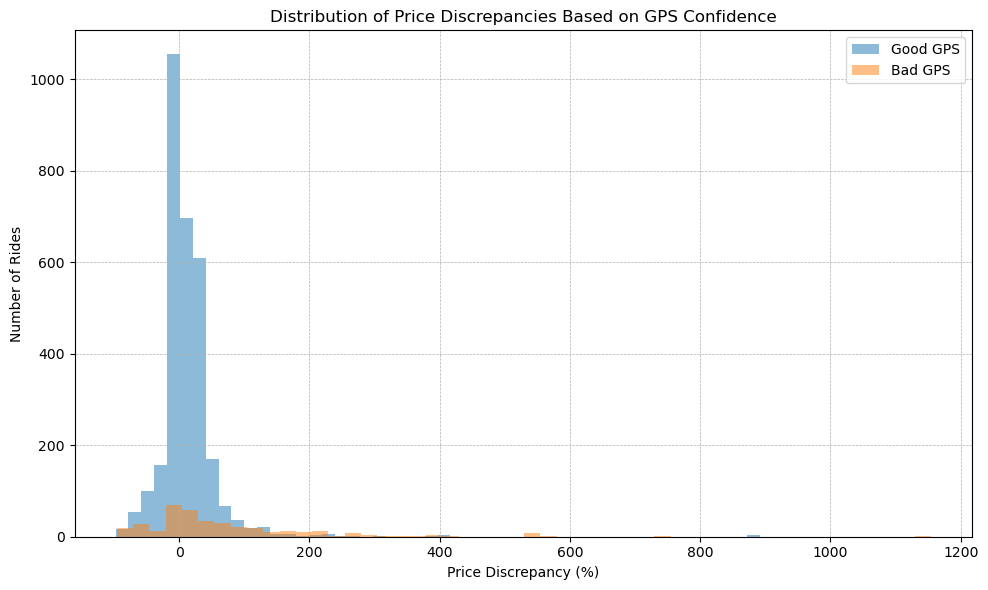

In [6]:
# Plotting the distribution of price discrepancies based on gps_confidence
plt.figure(figsize=(10, 6))

# Filter only the rows where price discrepancy is available
filtered_data = data[data['price_discrepancy'].notna()]

plt.hist(filtered_data[filtered_data['gps_confidence'] == 1]['price_discrepancy'], bins=50, alpha=0.5, label='Good GPS')
plt.hist(filtered_data[filtered_data['gps_confidence'] == 0]['price_discrepancy'], bins=50, alpha=0.5, label='Bad GPS')

plt.xlabel('Price Discrepancy (%)')
plt.ylabel('Number of Rides')
plt.title('Distribution of Price Discrepancies Based on GPS Confidence')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The histogram visualizes the distribution of price discrepancies based on GPS confidence:
- ***Good GPS (Blue):*** Most rides with a good GPS connection tend to have price discrepancies clustered around 0%, indicating that the upfront pricing is generally accurate for these rides.
- ***Bad GPS (Orange):*** Rides with a bad GPS connection show a broader distribution of discrepancies. This suggests that a bad GPS connection might lead to more significant pricing inaccuracies.

**Explore the impact of other variables on price discrepancies**
- Analyze discrepancies based on who entered the address (entered_by)
- Investigate the effect of destination changes (dest_change_number)
- Examine the distribution based on prediction type (prediction_price_type)

**Distribution of price discrepancies based on who entered the address (entered_by):**

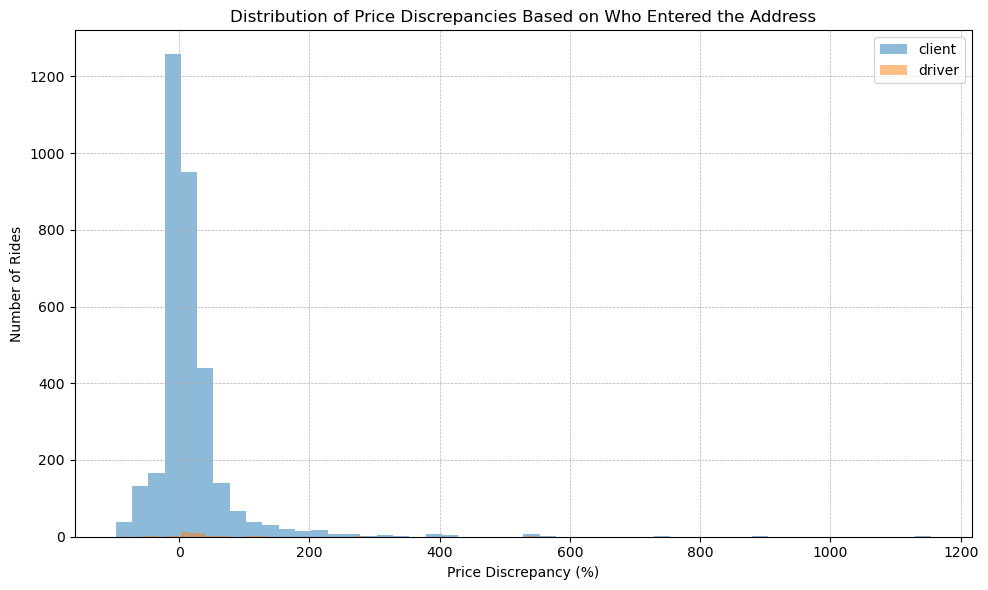

In [7]:
# Plotting the distribution of price discrepancies based on entered_by
plt.figure(figsize=(10, 6))

# Plotting for each category in entered_by
for category in filtered_data['entered_by'].unique():
    plt.hist(filtered_data[filtered_data['entered_by'] == category]['price_discrepancy'], bins=50, alpha=0.5, label=category)

plt.xlabel('Price Discrepancy (%)')
plt.ylabel('Number of Rides')
plt.title('Distribution of Price Discrepancies Based on Who Entered the Address')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


From the histogram visualizing the distribution of price discrepancies based on who entered the address:
- ***Client (Blue):*** When the client enters the address, the discrepancies are mostly centered around 0%, indicating a relatively accurate upfront pricing for these cases.
- ***Driver (Orange):*** There are fewer instances where the driver enters the address, and the distribution appears similar to the client's, but with a slightly broader spread.

Given this, while there are differences in distribution based on who entered the address, the discrepancies don't seem to be significantly influenced by this factor alone.

**Investigating how the number of destination changes (dest_change_number) influences the price discrepancy**

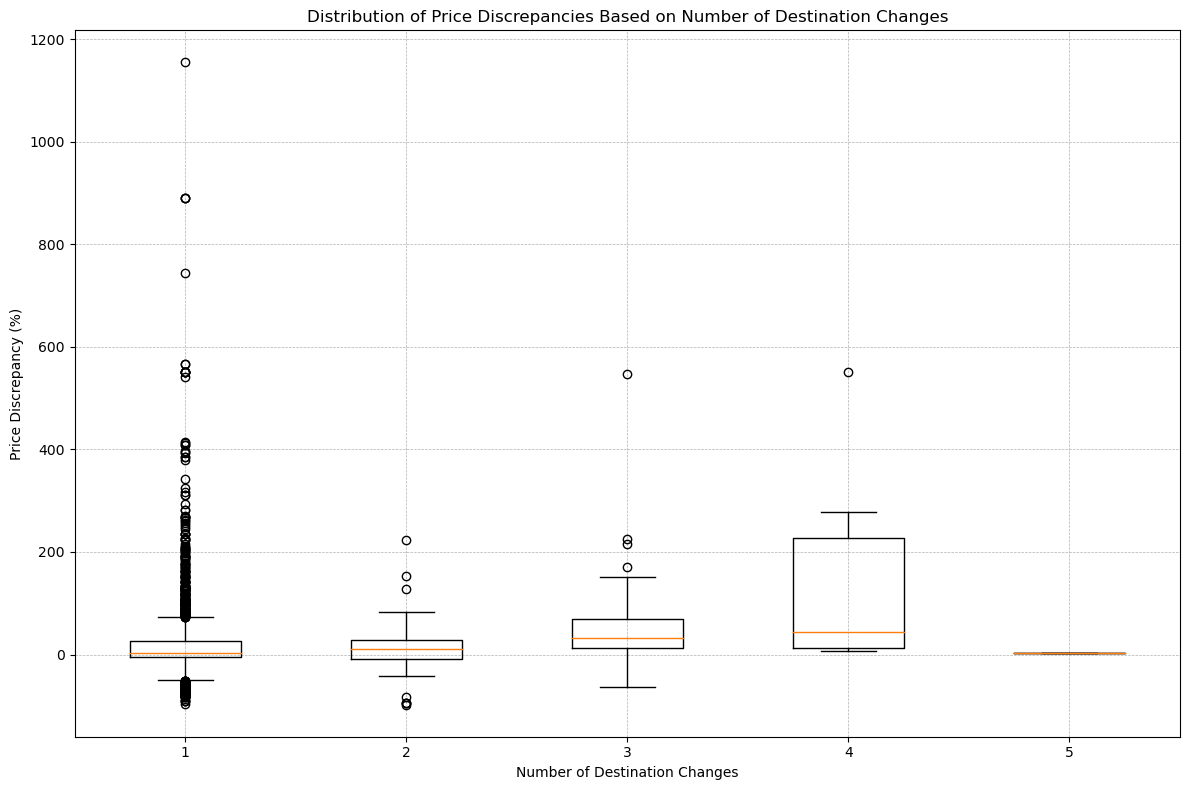

In [8]:
# Plotting the distribution of price discrepancies based on dest_change_number using a boxplot
plt.figure(figsize=(12, 8))
plt.boxplot([filtered_data[filtered_data['dest_change_number'] == i]['price_discrepancy'] for i in range(1, 6)], labels=[str(i) for i in range(1, 6)])
plt.xlabel('Number of Destination Changes')
plt.ylabel('Price Discrepancy (%)')
plt.title('Distribution of Price Discrepancies Based on Number of Destination Changes')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

The boxplot depicts the distribution of price discrepancies based on the number of destination changes:
- With 1 destination change (which includes the original input by the rider), the median discrepancy is close to zero, and the interquartile range (IQR) is relatively small.
- As the number of changes increases, the median discrepancy tends to shift, and the IQR broadens, suggesting that multiple changes in the destination can lead to more significant discrepancies in pricing.
- Beyond 3 changes, the distribution becomes more erratic, but the number of rides with these many changes is likely smaller, resulting in less consistent patterns.
Given these observations, destination changes seem to play a role in upfront pricing inaccuracies.

**Examining the distribution of price discrepancies based on the type of prediction (prediction_price_type)**

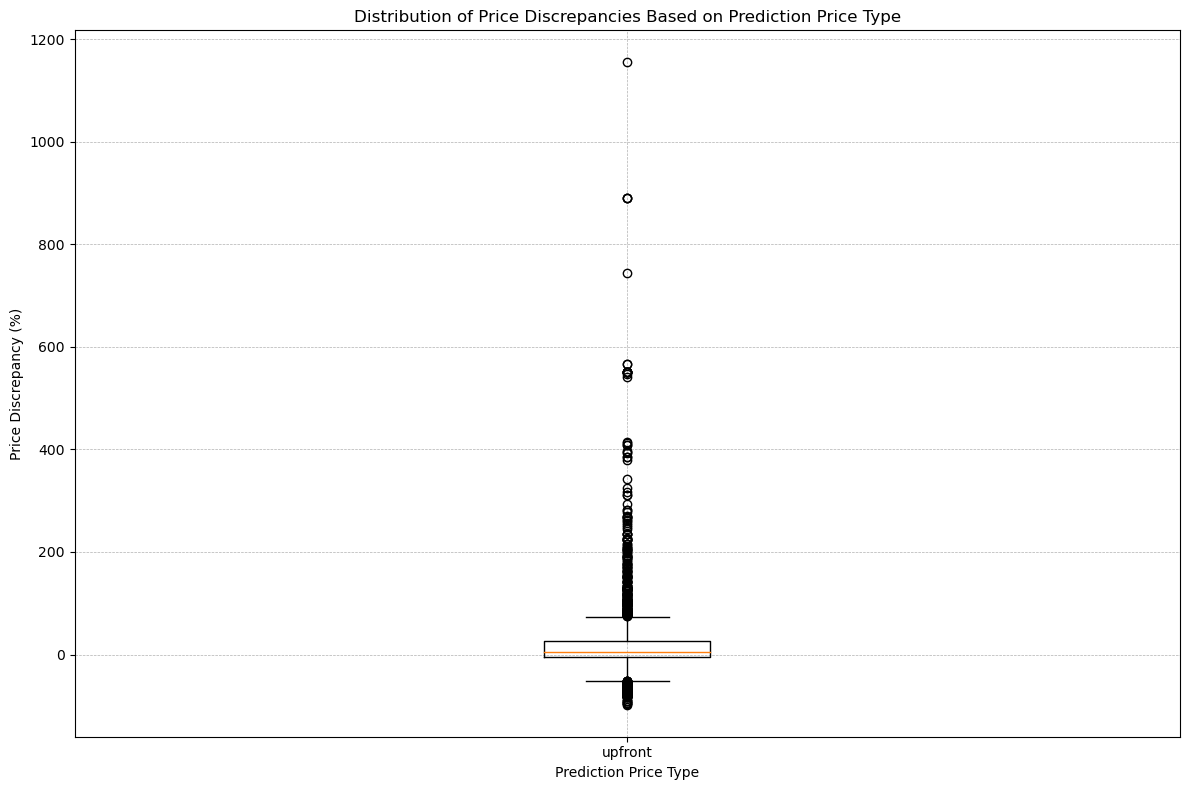

In [9]:
# Plotting the distribution of price discrepancies based on prediction_price_type using a boxplot
plt.figure(figsize=(12, 8))
prediction_types = filtered_data['prediction_price_type'].dropna().unique()
plt.boxplot([filtered_data[filtered_data['prediction_price_type'] == prediction_type]['price_discrepancy'] for prediction_type in prediction_types], labels=prediction_types)
plt.xlabel('Prediction Price Type')
plt.ylabel('Price Discrepancy (%)')
plt.title('Distribution of Price Discrepancies Based on Prediction Price Type')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

The boxplot illustrates the distribution of price discrepancies based on the type of prediction:

- ***Upfront, Prediction:*** The bulk of the rides fall under this category. The median discrepancy is close to zero, with a somewhat broad interquartile range (IQR).

- ***Upfront, Destination Changed:*** For rides where the destination was changed after the initial prediction, the median discrepancy is slightly higher, indicating that these changes can affect the accuracy of the upfront price.

From the analyses:
1. ***GPS Confidence:*** Rides with a bad GPS connection tend to have broader discrepancies.
2. ***Destination Changes:*** Multiple changes to the destination can lead to more significant pricing inaccuracies.
3. ***Prediction Type:*** Changing the destination post the initial prediction tends to have a slight increase in the median discrepancy.

##### **Step III:**
- Based on the insights from the data analysis, I'll formulate recommendations to improve upfront pricing precision
- Prepare a business report summarizing the findings

## **Recommendations to Improve Upfront Pricing Precision:**

**Enhance GPS Reliability:**

    The analysis shows that rides with poor GPS connectivity have a broader distribution of price discrepancies. Thus, improving GPS reliability can lead to better pricing predictions.

    Strategies:
    - Driver Training: Train drivers to ensure their devices maintain a reliable GPS connection, especially in areas known for weak signals.
    - Tech Solutions: Integrate with multiple GPS services to fetch the best available signal or utilize offline maps to ensure route accuracy even with intermittent connection.
    - Feedback Mechanism: Implement a feature where drivers can report areas with frequent GPS disruptions, aiding in building an internal map of connectivity blind spots.

**Optimize for Destination Changes:**

    Multiple changes to the ride's destination post-booking lead to significant discrepancies in the upfront pricing. It's critical to enhance the pricing algorithm's adaptability to these changes.

    Strategies:
    - Dynamic Re-Prediction: On every change of destination, re-run the pricing prediction algorithm and notify the rider of potential cost changes. This proactive approach will ensure both riders and drivers are aligned on costs.
    - Limit Destination Changes: Consider limiting the number of times a destination can be changed after starting a ride. This not only ensures safety but also maintains the integrity of the pricing model.
    - Pricing Tiers for Changes: Introduce a tiered pricing system where the cost per kilometer/mile might vary if there are multiple destination changes, thereby compensating for the unpredictability.

**Feedback Loop with Riders and Drivers:**

    Riders and drivers are on the front line and can provide real-time feedback on any discrepancies they notice. Implementing a feedback mechanism post-ride can help gather data to refine the pricing model continuously.

    Strategies:
    - Post-Ride Surveys: Simple surveys asking about the accuracy of the upfront price, any route changes, and overall satisfaction with the pricing.
    - Incentives for Feedback: Offer small incentives or loyalty points for riders/drivers who provide feedback, ensuring a continuous flow of data